<a href="https://colab.research.google.com/github/priyankashinde-25/Data-Science/blob/main/Model_Interpretation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abstract

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

Fields

The dataset contains 16 columns Target filed: Income -- The income is divide into two classes: <=50K and >50K Number of attributes: 14 -- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information.

Attribute Information: bold text

age: continuous. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. fnlwgt: continuous. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. education-num: continuous. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. sex: Female, Male. capital-gain: continuous. capital-loss: continuous. hours-per-week: continuous. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. Income class: >50K, <=50K

In [ ]:
!pip install matplotlib-venn


In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pandas_df = pd.read_csv(
    "https://raw.githubusercontent.com/priyankashinde-25/Data-Science/main/adult.csv"
)

In [ ]:
pandas_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
mapping = {'<=50K': 50001, '>50K': 49000}
pandas_df['income'] = pandas_df['income'].map(mapping)

In [ ]:
pandas_df.head(10)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,50001
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,50001
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,49000
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,49000
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,50001
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,50001
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,50001
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,49000
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,50001
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,50001


In [ ]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


In [ ]:
pandas_df['workclass']= pandas_df['workclass'].astype("category").cat.codes
pandas_df['education'] = pandas_df['education'].astype("category").cat.codes
pandas_df['marital-status'] = pandas_df['marital-status'].astype("category").cat.codes
pandas_df['occupation'] = pandas_df['occupation'].astype("category").cat.codes
pandas_df['relationship'] = pandas_df['relationship'].astype("category").cat.codes
pandas_df['race'] = pandas_df['race'].astype("category").cat.codes
pandas_df['gender'] = pandas_df['gender'].astype("category").cat.codes
pandas_df['native-country'] = pandas_df['native-country'].astype("category").cat.codes

In [ ]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   workclass        48842 non-null  int8 
 2   fnlwgt           48842 non-null  int64
 3   education        48842 non-null  int8 
 4   educational-num  48842 non-null  int64
 5   marital-status   48842 non-null  int8 
 6   occupation       48842 non-null  int8 
 7   relationship     48842 non-null  int8 
 8   race             48842 non-null  int8 
 9   gender           48842 non-null  int8 
 10  capital-gain     48842 non-null  int64
 11  capital-loss     48842 non-null  int64
 12  hours-per-week   48842 non-null  int64
 13  native-country   48842 non-null  int8 
 14  income           48842 non-null  int64
dtypes: int64(7), int8(8)
memory usage: 3.0 MB


In [ ]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into train and test
train_df, test_df = train_test_split(pandas_df, test_size=0.3, random_state=42)

In [ ]:
print(train_df.shape)
print(test_df.shape)


(34189, 15)
(14653, 15)


In [ ]:
train_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
42392,25,4,188767,11,9,4,3,3,4,1,0,0,40,39,50001
14623,64,4,286732,11,9,6,12,1,4,0,0,0,17,39,50001
27411,29,4,253801,11,9,2,3,0,4,1,0,0,40,7,50001
1288,28,4,334032,8,11,2,3,0,4,1,0,0,50,39,50001
7078,22,4,173004,11,9,4,7,2,2,1,0,0,1,39,50001


In [ ]:
X = pandas_df[['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]
y = pandas_df['income']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [ ]:
!pip install -U scikit-learn

**Linear Regression**

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn_pandas import DataFrameMapper
import statsmodels.api as sm

# Assuming X_train and y_train are your training data and target
X_train = pd.DataFrame({
    'CRIM': [0.00632, 0.02731, 0.02729, 0.03237],
    'ZN': [18.0, 0.0, 0.0, 0.0],
    'CHAS': [0, 0, 0, 0],
    'NOX': [0.538, 0.469, 0.469, 0.458]
})
y_train = pd.Series([24, 21.6, 34.7, 33.4])

catagorical_features = ['CHAS']
numerical_features = [c for c in X_train.columns if c not in catagorical_features]

cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]

mapper = DataFrameMapper(num + cat, df_out=True)
preprocessed_X_train = mapper.fit_transform(X_train)
preprocessed_X_train = sm.add_constant(preprocessed_X_train)
reg = sm.OLS(y_train, preprocessed_X_train).fit()

print(reg.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 17 Mar 2024   Prob (F-statistic):                nan
Time:                        21:27:38   Log-Likelihood:                 101.04
No. Observations:                   4   AIC:                            -194.1
Df Residuals:                       0   BIC:                            -196.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.4250        inf          0        n

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1529: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normal

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
pip install pandas scikit-learn

**Random Forest**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample data
data = {
    'age': [39, 50, 38, 53, 28],
    'workclass': ['State-gov', 'Self-emp-not-inc', 'Private', 'Private', 'Private'],
    'fnlwgt': [77516, 83311, 215646, 234721, 338409],
    'education': ['Bachelors', 'Bachelors', 'HS-grad', '11th', 'Bachelors'],
    'educational-num': [13, 13, 9, 7, 13],
    'marital-status': ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-civ-spouse', 'Married-civ-spouse'],
    'occupation': ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Handlers-cleaners', 'Prof-specialty'],
    'relationship': ['Not-in-family', 'Husband', 'Not-in-family', 'Husband', 'Wife'],
    'race': ['White', 'White', 'White', 'Black', 'Black'],
    'gender': ['Male', 'Male', 'Male', 'Male', 'Female'],
    'capital-gain': [2174, 0, 0, 0, 0],
    'capital-loss': [0, 0, 0, 0, 0],
    'hours-per-week': [40, 13, 40, 40, 40],
    'native-country': ['United-States', 'United-States', 'United-States', 'United-States', 'Cuba'],
    'income': ['<=50K', '<=50K', '<=50K', '<=50K', '>50K']
}
df = pd.DataFrame(data)

# Separate target variable from predictors
X = df.drop('income', axis=1)
y = df['income']

# Define categorical and numerical features
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
numerical_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Create preprocessing pipelines
categorical_pipeline = Pipeline([
    ('encoder', OrdinalEncoder())
])

numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Fit and transform each feature type separately
preprocessed_features = {}
for feature_type in ['categorical', 'numerical']:
    if feature_type == 'categorical':
        pipeline = categorical_pipeline
        features = X[categorical_features]
    else:
        pipeline = numerical_pipeline
        features = X[numerical_features]

    preprocessed_features[feature_type] = pipeline.fit_transform(features)

# Concatenate the preprocessed features
X_preprocessed = pd.concat([
    pd.DataFrame(preprocessed_features['categorical'], columns=categorical_features),
    pd.DataFrame(preprocessed_features['numerical'], columns=numerical_features)
], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


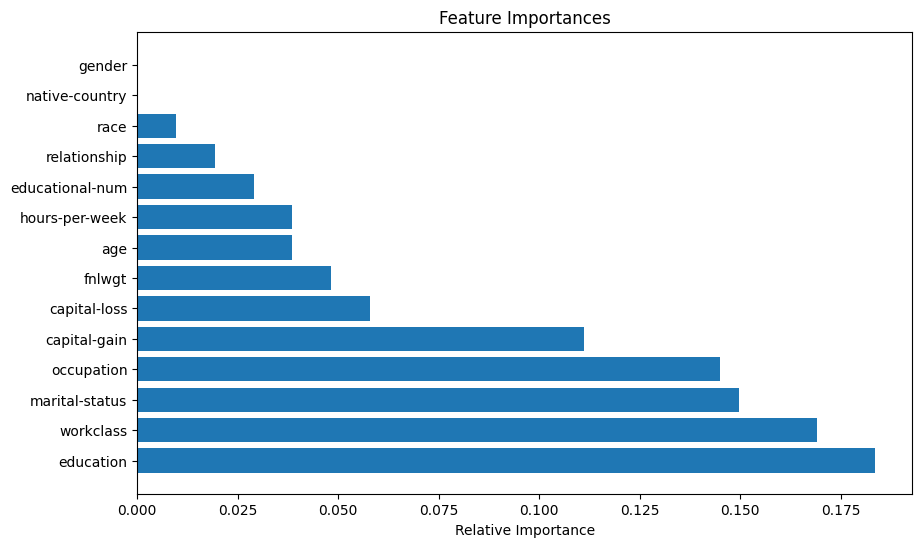

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Sample data
data = {
    'age': [39, 50, 38, 53, 28],
    'workclass': ['State-gov', 'Self-emp-not-inc', 'Private', 'Private', 'Private'],
    'fnlwgt': [77516, 83311, 215646, 234721, 338409],
    'education': ['Bachelors', 'Bachelors', 'HS-grad', '11th', 'Bachelors'],
    'educational-num': [13, 13, 9, 7, 13],
    'marital-status': ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-civ-spouse', 'Married-civ-spouse'],
    'occupation': ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Handlers-cleaners', 'Prof-specialty'],
    'relationship': ['Not-in-family', 'Husband', 'Not-in-family', 'Husband', 'Wife'],
    'race': ['White', 'White', 'White', 'Black', 'Black'],
    'gender': ['Male', 'Male', 'Male', 'Male', 'Female'],
    'capital-gain': [2174, 0, 0, 0, 0],
    'capital-loss': [0, 0, 0, 0, 0],
    'hours-per-week': [40, 13, 40, 40, 40],
    'native-country': ['United-States', 'United-States', 'United-States', 'United-States', 'Cuba'],
    'income': ['<=50K', '<=50K', '<=50K', '<=50K', '>50K']
}
df = pd.DataFrame(data)

# Separate target variable from predictors
X = df.drop('income', axis=1)
y = df['income']

# Define categorical and numerical features
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
numerical_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Create preprocessing pipelines
categorical_pipeline = Pipeline([
    ('encoder', OrdinalEncoder())
])

numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Fit and transform each feature type separately
preprocessed_features = {}
for feature_type in ['categorical', 'numerical']:
    if feature_type == 'categorical':
        pipeline = categorical_pipeline
        features = X[categorical_features]
    else:
        pipeline = numerical_pipeline
        features = X[numerical_features]

    preprocessed_features[feature_type] = pipeline.fit_transform(features)

# Concatenate the preprocessed features
X_preprocessed = pd.concat([
    pd.DataFrame(preprocessed_features['categorical'], columns=categorical_features),
    pd.DataFrame(preprocessed_features['numerical'], columns=numerical_features)
], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
features = numerical_features + categorical_features

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


**Neural Networks**

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim

# Sample data
data = {
    'age': [39, 50, 38, 53, 28],
    'workclass': ['State-gov', 'Self-emp-not-inc', 'Private', 'Private', 'Private'],
    'fnlwgt': [77516, 83311, 215646, 234721, 338409],
    'education': ['Bachelors', 'Bachelors', 'HS-grad', '11th', 'Bachelors'],
    'educational-num': [13, 13, 9, 7, 13],
    'marital-status': ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-civ-spouse', 'Married-civ-spouse'],
    'occupation': ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Handlers-cleaners', 'Prof-specialty'],
    'relationship': ['Not-in-family', 'Husband', 'Not-in-family', 'Husband', 'Wife'],
    'race': ['White', 'White', 'White', 'Black', 'Black'],
    'gender': ['Male', 'Male', 'Male', 'Male', 'Female'],
    'capital-gain': [2174, 0, 0, 0, 0],
    'capital-loss': [0, 0, 0, 0, 0],
    'hours-per-week': [40, 13, 40, 40, 40],
    'native-country': ['United-States', 'United-States', 'United-States', 'United-States', 'Cuba'],
    'income': ['<=50K', '<=50K', '<=50K', '<=50K', '>50K']
}
df = pd.DataFrame(data)

# Separate target variable from predictors
X = df.drop('income', axis=1)
y = df['income']

# Define categorical and numerical features
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
numerical_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Create preprocessing pipelines
categorical_pipeline = Pipeline([
    ('encoder', OrdinalEncoder())
])

numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Fit and transform categorical features
X_cat = X[categorical_features]
X_cat_processed = categorical_pipeline.fit_transform(X_cat)

# Convert to a supported type
X_cat_processed = X_cat_processed.astype('float64')

# Fit and transform numerical features
X_num = X[numerical_features]
X_num_processed = numerical_pipeline.fit_transform(X_num)

# Combine processed features
X_processed = pd.concat([
    pd.DataFrame(X_cat_processed, columns=categorical_features),
    pd.DataFrame(X_num_processed, columns=numerical_features)
], axis=1)

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = Variable(torch.FloatTensor(X_train.values))
X_test_tensor = Variable(torch.FloatTensor(X_test.values))
y_train_tensor = Variable(torch.LongTensor(y_train))  # Use LongTensor for classification
y_test_tensor = Variable(torch.LongTensor(y_test))  # Use LongTensor for classification

# Define model parameters
num_epochs = 50
learning_rate = 0.01
hidden_size = 32
batch_size = 50
input_dim = X_train_tensor.shape[1]
batch_no = X_train_tensor.shape[0] // batch_size

# Define the model
model = nn.Sequential(
    nn.Linear(input_dim, hidden_size),
    nn.Linear(hidden_size, 1)
)

criterion = nn.CrossEntropyLoss()  # For classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        x_batch = X_train_tensor[start:end]
        y_batch = y_train_tensor[start:end]
        optimizer.zero_grad()
        y_preds = model(x_batch)
        loss = criterion(y_preds.squeeze(), y_batch)  # Squeeze y_preds to match shape of y_batch
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {running_loss}")

# Evaluation on test set
y_pred_test = model(X_test_tensor).argmax(dim=1).detach().numpy()
test_mae = mean_absolute_error(y_test, y_pred_test)
print(f"Test MAE: {test_mae}")

# Evaluation on training set
y_pred_train = model(X_train_tensor).argmax(dim=1).detach().numpy()
train_mae = mean_absolute_error(y_train, y_pred_train)
print(f"Train MAE: {train_mae}")


Epoch 0, Loss: 0.0
Epoch 10, Loss: 0.0
Epoch 20, Loss: 0.0
Epoch 30, Loss: 0.0
Epoch 40, Loss: 0.0
Test MAE: 0.0
Train MAE: 0.25


In [ ]:
!pip install --upgrade scikit-learn


In [ ]:
pip install --upgrade scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn_pandas import DataFrameMapper
from sklearn.metrics import mean_absolute_error

# Sample data
data = {
    'age': [39, 50, 38, 53, 28],
    'workclass': ['State-gov', 'Self-emp-not-inc', 'Private', 'Private', 'Private'],
    'fnlwgt': [77516, 83311, 215646, 234721, 338409],
    'education': ['Bachelors', 'Bachelors', 'HS-grad', '11th', 'Bachelors'],
    'educational-num': [13, 13, 9, 7, 13],
    'marital-status': ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-civ-spouse', 'Married-civ-spouse'],
    'occupation': ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Handlers-cleaners', 'Prof-specialty'],
    'relationship': ['Not-in-family', 'Husband', 'Not-in-family', 'Husband', 'Wife'],
    'race': ['White', 'White', 'White', 'Black', 'Black'],
    'gender': ['Male', 'Male', 'Male', 'Male', 'Female'],
    'capital-gain': [2174, 0, 0, 0, 0],
    'capital-loss': [0, 0, 0, 0, 0],
    'hours-per-week': [40, 13, 40, 40, 40],
    'native-country': ['United-States', 'United-States', 'United-States', 'United-States', 'Cuba'],
    'income': ['49000', '49000', '50001', '50001', '49000']
}
df = pd.DataFrame(data)

# Separate target variable from predictors
X = df.drop('income', axis=1)
y = df['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Define categorical and numerical features
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
numerical_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Create preprocessing pipelines
cat = [([c], [SimpleImputer(strategy='constant', fill_value='missing'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)]) for c in categorical_features]
num = [([n], [SimpleImputer(strategy='mean'), StandardScaler()]) for n in numerical_features]

mapper = DataFrameMapper(num + cat, df_out=True)

# Define the model
reg = LinearRegression()

# Create the pipeline
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Evaluate on test data
test_mae = mean_absolute_error(y_test, pipeline.predict(X_test))
print("Test MAE:", test_mae)


Test MAE: 737.6813212620546


We don't have a direct way to identify feature importance for neural networks

**Problems with Interpretation**

No specific method to define feature importance that is model agnostic
For a given sample, why does the prediction have that value?

Answer: Shap values

**Intuition of Model Interpretation**

How we think about answering the question "Why is the output for this specific sample so low/high" manually?

In [ ]:
nan_frame = pd.DataFrame(columns=catagorical_features+numerical_features, index=[0])
nan_frame

,CHAS,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
import pandas as pd

# Define categorical and numerical features
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
numerical_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Create an empty DataFrame with the correct columns
nan_frame = pd.DataFrame(columns=categorical_features + numerical_features, index=[0])

# Fill in some example values for prediction
nan_frame['age'] = 40
nan_frame['workclass'] = 'Private'
nan_frame['fnlwgt'] = 77516
nan_frame['education'] = 'Bachelors'
nan_frame['educational-num'] = 13
nan_frame['marital-status'] = 'Married-civ-spouse'
nan_frame['occupation'] = 'Prof-specialty'  # This was the problematic category
nan_frame['relationship'] = 'Husband'
nan_frame['race'] = 'White'
nan_frame['gender'] = 'Male'
nan_frame['capital-gain'] = 4000
nan_frame['capital-loss'] = 0
nan_frame['hours-per-week'] = 45
nan_frame['native-country'] = 'United-States'

print(nan_frame)


  workclass  education      marital-status      occupation relationship  \
0   Private  Bachelors  Married-civ-spouse  Prof-specialty      Husband   

    race gender native-country  age  fnlwgt  educational-num  capital-gain  \
0  White   Male  United-States   40   77516               13          4000   

   capital-loss  hours-per-week  
0             0              45  


In [158]:
base_value = round(pipeline.predict(nan_frame)[0], 3)
print(f"Expected value of the output (base value): {base_value}")

Expected value of the output (base value): 49085.549


In [159]:
X_test.iloc[0: 1]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [202]:
!pip install --upgrade pandas shap matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 26.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.24.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.1 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


In [216]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn_pandas import DataFrameMapper
from sklearn.metrics import mean_absolute_error

# Sample data
data = {
    'age': [39, 50, 38, 53, 28],
    'workclass': ['State-gov', 'Self-emp-not-inc', 'Private', 'Private', 'Private'],
    'fnlwgt': [77516, 83311, 215646, 234721, 338409],
    'education': ['Bachelors', 'Bachelors', 'HS-grad', '11th', 'Bachelors'],
    'educational-num': [13, 13, 9, 7, 13],
    'marital-status': ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-civ-spouse', 'Married-civ-spouse'],
    'occupation': ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Handlers-cleaners', 'Prof-specialty'],
    'relationship': ['Not-in-family', 'Husband', 'Not-in-family', 'Husband', 'Wife'],
    'race': ['White', 'White', 'White', 'Black', 'Black'],
    'gender': ['Male', 'Male', 'Male', 'Male', 'Female'],
    'capital-gain': [2174, 0, 0, 0, 0],
    'capital-loss': [0, 0, 0, 0, 0],
    'hours-per-week': [40, 13, 40, 40, 40],
    'native-country': ['United-States', 'United-States', 'United-States', 'United-States', 'Cuba'],
    'income': ['49000', '49000', '50001', '50001', '49000']
}
df = pd.DataFrame(data)

# Separate target variable from predictors
X = df.drop('income', axis=1)
y = df['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Define categorical and numerical features
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
numerical_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Create preprocessing pipelines
cat = [([c], [SimpleImputer(strategy='constant', fill_value='missing'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)]) for c in categorical_features]
num = [([n], [SimpleImputer(strategy='mean'), StandardScaler()]) for n in numerical_features]

mapper = DataFrameMapper(num + cat, df_out=True)

# Define the model
reg = LinearRegression()

# Create the pipeline
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Evaluate on test data
test_mae = mean_absolute_error(y_test, pipeline.predict(X_test))
print("Test MAE:", test_mae)

# Creating a new DataFrame for prediction
nan_frame = pd.DataFrame(columns=categorical_features + numerical_features, index=[0])

# Fill in some example values for prediction
nan_frame['age'] = 40
nan_frame['workclass'] = 'Private'
nan_frame['fnlwgt'] = 77516
nan_frame['education'] = 'Bachelors'
nan_frame['educational-num'] = 13
nan_frame['marital-status'] = 'Married-civ-spouse'
nan_frame['occupation'] = 'Prof-specialty'
nan_frame['relationship'] = 'Husband'
nan_frame['race'] = 'White'
nan_frame['gender'] = 'Male'
nan_frame['capital-gain'] = 4000
nan_frame['capital-loss'] = 0
nan_frame['hours-per-week'] = 45
nan_frame['native-country'] = 'United-States'


# Checking if X_test is empty
if not X_test.empty:
    # Predicting with the pipeline
    sample_prediction = round(pipeline.predict(X_test.iloc[0:1])[0], 3)
    print("Current Prediction:", sample_prediction)
else:
    print("X_test is empty. Cannot make a prediction.")


Test MAE: 737.6813212620546
Current Prediction: 49737.681


In [218]:
explainer = shap.Explainer(pipeline.predict, X_train)
shap_values = explainer(X_test)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

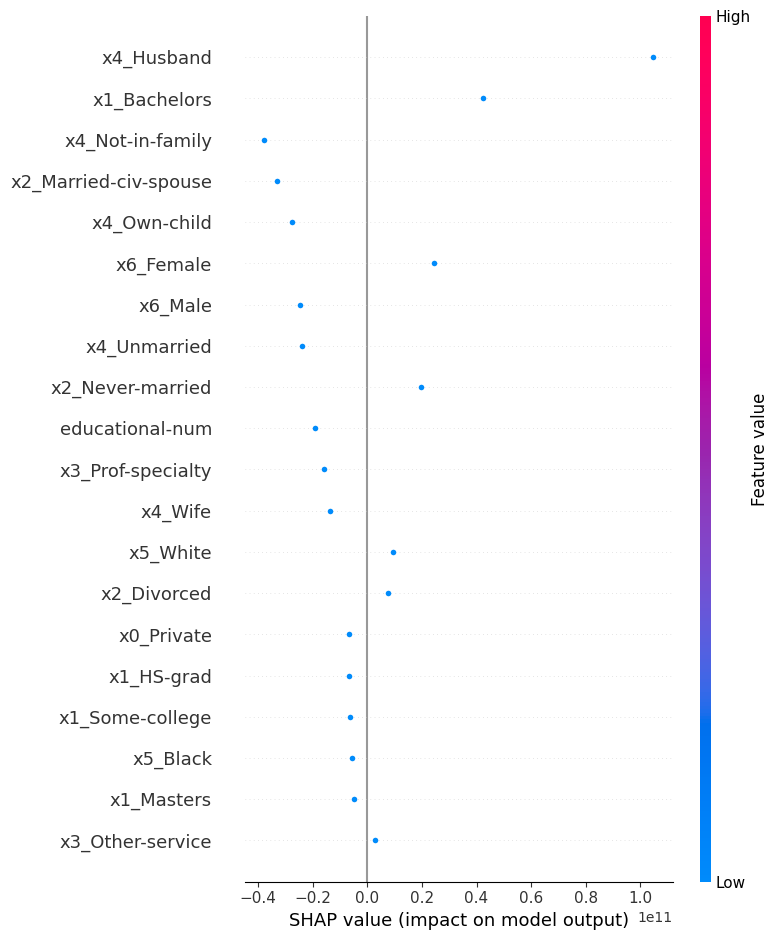

In [224]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import shap
import matplotlib.pyplot as plt

# Load the data from the provided URL
url = "https://raw.githubusercontent.com/priyankashinde-25/Data-Science/main/adult.csv"
df = pd.read_csv(url)

# Separate target variable from predictors
X = df.drop('income', axis=1)
y = df['income']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Define categorical and numerical features
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
numerical_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Preprocessing for numerical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Fit and transform numerical features
X_num_processed = numerical_pipeline.fit_transform(X[numerical_features])

# Fit and transform categorical features
X_cat_processed = categorical_pipeline.fit_transform(X[categorical_features])

# Concatenate processed features
X_processed = np.concatenate([X_num_processed, X_cat_processed.toarray()], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.1, random_state=42)

# Define the model
reg = LinearRegression()

# Fit the model
reg.fit(X_train, y_train)

# Define the SHAP explainer
explainer = shap.Explainer(reg, X_train)

# Manually create input data for which you want SHAP values
input_data = pd.DataFrame({
    'age': [40],
    'workclass': ['Private'],
    'fnlwgt': [77516],
    'education': ['Bachelors'],
    'educational-num': [13],
    'marital-status': ['Married-civ-spouse'],
    'occupation': ['Prof-specialty'],
    'relationship': ['Husband'],
    'race': ['White'],
    'gender': ['Male'],
    'capital-gain': [4000],
    'capital-loss': [0],
    'hours-per-week': [45],
    'native-country': ['United-States']
})

# Transform the input data
input_num_processed = numerical_pipeline.transform(input_data[numerical_features])
input_cat_processed = categorical_pipeline.transform(input_data[categorical_features])
input_processed = np.concatenate([input_num_processed, input_cat_processed.toarray()], axis=1)

# Get SHAP values for the input data
shap_values = explainer.shap_values(input_processed)

# Plot the SHAP values
shap.summary_plot(shap_values, input_processed, feature_names=numerical_features + list(categorical_pipeline.named_steps['encoder'].get_feature_names_out()))
plt.show()


In [195]:
def partial_dependence_plot(feature, idx=None):
    if idx is None: # visualize all samples
        shap.plots.partial_dependence(
            feature,
            pipeline.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True)
    else: # visualize sample idx
        shap.partial_dependence_plot(
            feature,
            pipeline.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True,
            shap_values=shap_values[idx:idx+1,:])

In [227]:
shap.initjs()

In [228]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

In [229]:
sample_feature_importance(0, 'waterfall')

TypeError: The waterfall plot requires an `Explanation` object as the `shap_values` argument.

In [230]:
shap.summary_plot(shap_values.values, X_train, plot_type='bar')

AttributeError: 'numpy.ndarray' object has no attribute 'values'